In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.insert(1, "../python/functions")
sys.path.insert(2, "../python/architecture")

In [3]:
from data_prep_functions import wine_prep
from plotting_functions import nn_plot_epoch_mse
from enkf_functions import enkf_regressor_extension
from saving_functions import load_objects
from model_functions import nn_load
import reproducible
import no_gpu
from sklearn.metrics import mean_squared_error
import numpy as np

In [4]:
X_train, X_test, y_train, y_test = wine_prep()

In [5]:
# old settings -> the corresponding model shall be extended
setting_dict = {"particles": 1,
                "epochs": 100,
                "batch_size": 200,    # len(X_train)
                "h_0": 2,
                "epsilon": 0.5,
                "randomization": False,
                "shuffle": True,
                "early_stopping": False,
                "early_stopping_diff": 0.001
               }

additional_epochs = 20

In [6]:
particle_list = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000]
particle_list = [2000]

In [7]:
import time

Epoch 101. Training MSE: 0.209, Test MSE: 0.506.
Epoch 102. Training MSE: 0.21, Test MSE: 0.505.
Epoch 103. Training MSE: 0.209, Test MSE: 0.507.
Epoch 104. Training MSE: 0.208, Test MSE: 0.507.
Epoch 105. Training MSE: 0.207, Test MSE: 0.508.
Epoch 106. Training MSE: 0.206, Test MSE: 0.509.
Epoch 107. Training MSE: 0.206, Test MSE: 0.51.
Epoch 108. Training MSE: 0.205, Test MSE: 0.512.
Epoch 109. Training MSE: 0.204, Test MSE: 0.513.
Epoch 110. Training MSE: 0.204, Test MSE: 0.513.
Epoch 111. Training MSE: 0.204, Test MSE: 0.512.
Epoch 112. Training MSE: 0.202, Test MSE: 0.515.
Epoch 113. Training MSE: 0.201, Test MSE: 0.518.
Epoch 114. Training MSE: 0.2, Test MSE: 0.519.
Epoch 115. Training MSE: 0.2, Test MSE: 0.518.
Epoch 116. Training MSE: 0.199, Test MSE: 0.52.
Epoch 117. Training MSE: 0.199, Test MSE: 0.52.
Epoch 118. Training MSE: 0.198, Test MSE: 0.522.
Epoch 119. Training MSE: 0.198, Test MSE: 0.52.
Epoch 120. Training MSE: 0.197, Test MSE: 0.522.
Calculation time for 2000 par

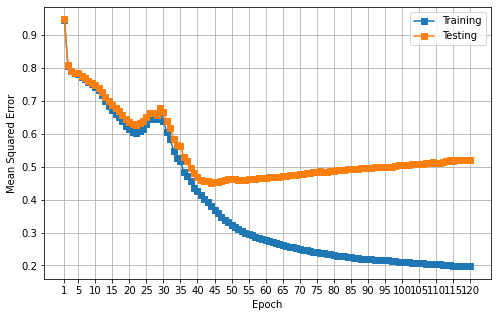

In [8]:
for p in particle_list:
    setting_dict["particles"] = p
    
    import random
    import os
    import numpy as np
    import tensorflow as tf

    os.environ['PYTHONHASHSEED'] = '0'
    np.random.seed(42)
    random.seed(42)
    session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads = 1, inter_op_parallelism_threads = 1)
    tf.compat.v1.set_random_seed(42)
    sess = tf.compat.v1.Session(graph = tf.compat.v1.get_default_graph(), config = session_conf)
    tf.compat.v1.keras.backend.set_session(sess)

    start_time = time.time()
    mean_model, mean_model_train_mse, mean_model_test_mse = enkf_regressor_extension(extend_model = "../models/wine/enkf_wine_full_E{}_B{}_P{}_H{}.h5".format(setting_dict["epochs"], setting_dict["batch_size"], p, setting_dict["h_0"]),
                                                                                     additional_epochs = additional_epochs,
                                                                                     save_all = True,
                                                                                     verbose = 1)
    end_time = time.time()
    print("Calculation time for {} particles: {} minutes.".format(p, (end_time - start_time) / 60))
    nn_plot_epoch_mse(mean_model_train_mse,
                      mean_model_test_mse,
                      mse_mean = None,
                      savefig = True,
                      file = "../img/wine/enkf_wine_full_E{}_B{}_P{}_H{}.png".format(setting_dict["epochs"]+additional_epochs, setting_dict["batch_size"], p, setting_dict["h_0"]))